In [185]:
import pandas as pd
import numpy as np
import json
from datetime import datetime

## Read files

In [186]:
# 번프 판매액
df_bunp = pd.read_csv('../csv/bunp_category_detail.csv')

df_bunp['category_3'] = df_bunp['category'].astype(str).str[:3]

df_bunp['month'] = df_bunp['updated_at'].astype(str).str[:7]
df_bunp['month'] = pd.to_datetime(df_bunp['month']) # str -> timestamp

df_bunp.tail()

,category,name,updated_at,seller_pid,bunp_amount,category_3,month
10316213,310130030.0,롱 스커트,2019-05-20 14:41:21,101055270,8000,310,2019-05-01
10316214,400010200.0,크로스백,2019-05-20 15:13:41,102076822,28000,400,2019-05-01
10316215,999.0,기타,2019-05-20 16:13:41,100020222,10000,999,2019-05-01
10316216,900320100.0,피규어/인형,2019-05-20 16:26:18,102385162,116000,900,2019-05-01
10316217,400050100.0,단화/플랫슈즈,2019-05-20 16:41:47,102192601,350000,400,2019-05-01


In [187]:
# 제품 카테고리

path = '../csv/categories.csv'

df_categories = pd.read_csv(path)

df_categories['category'] = df_categories['category'].astype(str)
df_categories = df_categories[['category',  'name']]

df_categories.tail()

,category,name
1219,240100030,서비스/미디어
1220,240100050,생산/기능직
1221,240100070,상담영업
1222,240100090,기타 업종
1223,240100110,단기알바


## 데이터 핸들링

In [189]:
# merge bunp with category

df_bunp_cate = pd.merge(df_bunp, df_categories, how = 'left', left_on = 'category_3', right_on = 'category')

df_bunp_cate = df_bunp_cate.rename(columns = {'name_x': 'name_detail', 'name_y': 'name_general'})

df_bunp_cate_general = df_bunp_cate.groupby(['month', 'name_general']).agg({'bunp_amount': 'sum'}).unstack()
df_bunp_cate_detail = df_bunp_cate.groupby(['month', 'name_detail']).agg({'bunp_amount': 'sum'}).unstack()

df_bunp_cate_general['total'] = df_bunp_cate_general[:].sum(axis=1) 
df_bunp_cate_detail['total'] = df_bunp_cate_detail[:].sum(axis=1) 

## 상관계수 구하기

In [190]:
# correlation
df_bunp_cate_general.corr()

bunp_amount                                \
name_general                 (구)패션의류      구인구직        기타      남성의류   
            name_general                                             
bunp_amount (구)패션의류         1.000000 -0.102406 -0.470912 -0.025927   
            구인구직           -0.102406  1.000000  0.058978  0.270433   
            기타             -0.470912  0.058978  1.000000  0.634200   
            남성의류           -0.025927  0.270433  0.634200  1.000000   
            도서/티켓/취미/애완    -0.062004  0.343552  0.468380  0.863519   
            디지털/가전         -0.134787  0.448535  0.542808  0.856742   
            번개나눔           -0.044901 -0.356722 -0.022442 -0.304394   
            뷰티/미용          -0.179514  0.415317  0.793413  0.783786   
            생활/문구/가구/식품    -0.394816  0.411175  0.808336  0.839303   
            스타굿즈           -0.261413  0.301088  0.739425  0.689542   
            스포츠/레저          0.007841  0.250583  0.561682  0.529655   
            여성의류           -0.109355  0.172405  0.737977  0.955219   
            원룸/함께살아요       -0.169452  0.118738  0.265320  0.393085   
            유아동/출산         -0.195602 -0.016304  0.789293  0.679826   
            재능             -0.312119  0.351834  0.668142  0.778575   
            지역 서비스         -0.176478  0.352909  0.390796  0.393403   
            차량/오토바이        -0.105236  0.282477  0.443355  0.622374   
            커뮤니티            0.200155 -0.352823  0.334510 -0.159845   
            패션잡화           -0.083688  0.528783  0.610376  0.786868   
total                      -0.117675  0.391256  0.692374  0.943001   

                                                                    \
name_general             도서/티켓/취미/애완    디지털/가전      번개나눔     뷰티/미용   
            name_general                                             
bunp_amount (구)패션의류        -0.062004 -0.134787 -0.044901 -0.179514   
            구인구직            0.343552  0.448535 -0.356722  0.415317   
            기타              0.468380  0.542808 -0.022442  0.793413   
            남성의류            0.863519  0.856742 -0.304394  0.783786   
            도서/티켓/취미/애완     1.000000  0.944603 -0.172965  0.793373   
            디지털/가전          0.944603  1.000000 -0.254275  0.879864   
            번개나눔           -0.172965 -0.254275  1.000000 -0.150990   
            뷰티/미용           0.793373  0.879864 -0.150990  1.000000   
            생활/문구/가구/식품     0.838567  0.907028 -0.131874  0.975581   
            스타굿즈            0.713670  0.808254 -0.107511  0.847026   
            스포츠/레저          0.641194  0.743974 -0.108544  0.836757   
            여성의류            0.737128  0.722617 -0.240489  0.758801   
            원룸/함께살아요        0.190739  0.226658 -0.039368  0.210140   
            유아동/출산          0.364395  0.378307 -0.013754  0.637578   
            재능              0.796208  0.869722 -0.118700  0.835497   
            지역 서비스          0.512396  0.613531 -0.083405  0.612620   
            차량/오토바이         0.816294  0.812524 -0.105290  0.758053   
            커뮤니티           -0.300574 -0.276650  0.110954 -0.036354   
            패션잡화            0.860316  0.957909 -0.252996  0.937055   
total                       0.922524  0.961751 -0.254581  0.926650   

                                                                              \
name_general             생활/문구/가구/식품      스타굿즈    스포츠/레저      여성의류  원룸/함께살아요   
            name_general                                                       
bunp_amount (구)패션의류        -0.394816 -0.261413  0.007841 -0.109355 -0.169452   
            구인구직            0.411175  0.301088  0.250583  0.172405  0.118738   
            기타              0.808336  0.739425  0.561682  0.737977  0.265320   
            남성의류            0.839303  0.689542  0.529655  0.955219  0.393085   
            도서/티켓/취미/애완     0.838567  0.713670  0.641194  0.737128  0.190739   
            디지털/가전          0.907028  0.808254  0.743974  0.722617  0.226658   
            번개나눔           -0.131874 -0.107511 -0.108544 -0.240489 -0.039368   
   

In [194]:
# correlation
df_bunp_cate_detail.corr()

bunp_amount                                \
name_detail                    (구)가방/지갑   (구)여성의류 (구)쥬얼리/시계   BB/CC크림   
            name_detail                                                 
bunp_amount (구)가방/지갑                NaN       NaN       NaN       NaN   
            (구)여성의류                 NaN  1.000000       NaN -0.031142   
            (구)쥬얼리/시계               NaN       NaN       NaN       NaN   
            BB/CC크림                 NaN -0.031142       NaN  1.000000   
            BB크림                    NaN -0.909542       NaN -0.131422   
            BB탄총/전동건                NaN -0.477358       NaN -0.017039   
            CD/DVD/음반               NaN -0.874563       NaN  0.294690   
            CPU/메인보드                NaN -0.820533       NaN  0.135817   
            DIY/리폼용품/공구             NaN -0.869057       NaN  0.643271   
            DSLR/미러리스               NaN -0.786723       NaN  0.177382   
            DVD/블루레이/영상             NaN -0.603520       NaN  0.131874   
            HDD/ODD/SSD             NaN -0.928561       NaN  0.435621   
            IT/디자인 기타               NaN       NaN       NaN -0.473274   
            MTB/산악                  NaN  0.239558       NaN  0.108971   
            PC/모니터/주변기기             NaN       NaN       NaN  0.765519   
            PC게임                    NaN -0.583177       NaN -0.265550   
            RC/무선조종/드론              NaN -0.806640       NaN  0.204729   
            SUV/RV                  NaN -0.661093       NaN  0.313561   
            TV(LCD/LED/PDP)         NaN -0.999488       NaN  0.436184   
            USB/케이블/스피커             NaN -0.824283       NaN  0.628578   
            XBOX                    NaN -0.648355       NaN  0.102414   
            가구                      NaN       NaN       NaN  0.270449   
            가구/침대/매트                NaN -0.659521       NaN  0.435761   
            가디건                     NaN       NaN       NaN  0.698428   
            가디건                     NaN       NaN       NaN  0.812931   
            가디건/조끼                  NaN -0.914488       NaN  0.134569   
            가방                      NaN -0.651748       NaN  0.392982   
            가전제품                    NaN       NaN       NaN  0.612686   
            가죽 레깅스                  NaN -0.691494       NaN  0.058465   
            가죽 자켓                   NaN -0.867339       NaN  0.118254   
...                                 ...       ...       ...       ...   
            하이웨스트 팬츠                NaN -0.939207       NaN  0.433850   
            하이힐(8cm이상)              NaN  0.313036       NaN  0.765485   
            하프 코트                   NaN -0.987436       NaN -0.050063   
            학습/사전/참고서               NaN -0.657765       NaN  0.116654   
            학습도구/문구/필기류             NaN -0.900629       NaN  0.265754   
            학원/수강                   NaN       NaN       NaN  0.127595   
            핫 팬츠                    NaN  0.997715       NaN  0.207160   
            핸드/풋케어                  NaN -0.758612       NaN  0.220546   
            향수/아로마                  NaN       NaN       NaN  0.429936   
            허브/공유기                  NaN -0.630426       NaN  0.293586   
            헤어 액세서리                 NaN  0.496812       NaN  0.240214   
            헤어/바디                   NaN       NaN       NaN  0.786639   
            헤어스타일링                  NaN -0.932597       NaN  0.650660   
            헤어에센스/트리트먼트             NaN -0.289584       NaN  0.573668   
            헤어컬러(염색)                NaN -0.303715       NaN  0.413120   
            헨리넥 셔츠                  NaN -0.165208       NaN  0.096472   
            헬스/요가                   NaN -1.000000       NaN -0.189467   
            헬스/요가 용품                NaN -0.452279       NaN  0.461627   
            헬스/요가 의류/잡화             NaN  0.299085       NaN  0.406772   
            헬스/요가/골프                NaN       NaN       NaN  0.032174   
            호텔/펜션/숙박                NaN -0.287117       NaN  0.253600   
            화

## Seasonality Decomposition

In [196]:
# 전체 거래액 분해

df_bunp_cate_general_agg = df_bunp_cate_general.groupby(['month']).agg({'total': 'sum'})
df_bunp_cate_general_agg.tail()

,total
month,
2019-01-01,2.313649e+10
2019-02-01,2.261814e+10
2019-03-01,2.358679e+10
2019-04-01,2.162429e+10
2019-05-01,1.325028e+10


In [195]:

from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

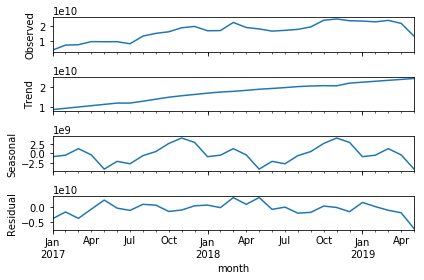

In [216]:


# from random import randrange
# from pandas import Series
# from matplotlib import pyplot
# from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_bunp_cate_general_agg, model='additive', freq=12, extrapolate_trend='freq')
result.plot()
pyplot.show()


# multiplicative

In [200]:
print(result.trend)

                   total
month                   
2017-01-01           NaN
2017-02-01           NaN
2017-03-01           NaN
2017-04-01           NaN
2017-05-01           NaN
2017-06-01           NaN
2017-07-01  1.216837e+10
2017-08-01  1.308885e+10
2017-09-01  1.408962e+10
2017-10-01  1.507863e+10
2017-11-01  1.581077e+10
2017-12-01  1.644634e+10
2018-01-01  1.709814e+10
2018-02-01  1.764547e+10
2018-03-01  1.800452e+10
2018-04-01  1.849328e+10
2018-05-01  1.904532e+10
2018-06-01  1.944045e+10
2018-07-01  1.985911e+10
2018-08-01  2.035952e+10
2018-09-01  2.065308e+10
2018-10-01  2.082174e+10
2018-11-01  2.073563e+10
2018-12-01           NaN
2019-01-01           NaN
2019-02-01           NaN
2019-03-01           NaN
2019-04-01           NaN
2019-05-01           NaN


In [199]:
df_bunp_cate_general_1 = df_bunp_cate.groupby(['month', 'name_general'], as_index=False).sum()
df_bunp_cate_general_1.tail()

,month,name_general,category_x,seller_pid,bunp_amount
520,2019-05-01,재능,5.570706e+10,24522007162,8529542
521,2019-05-01,지역 서비스,6.847983e+06,3140713301,1231600
522,2019-05-01,차량/오토바이,5.073116e+11,130381998577,207724552
523,2019-05-01,커뮤니티,4.636200e+06,4544457818,1114900
524,2019-05-01,패션잡화,2.059974e+13,4924506295627,4059643829


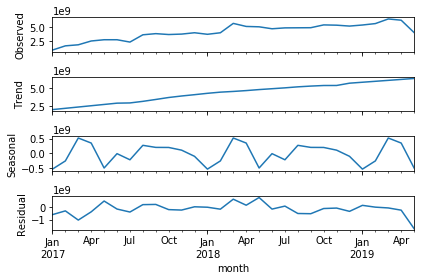

In [219]:
df = df_bunp_cate_general_1[df_bunp_cate_general_1.name_general == '패션잡화']

df_agg = df.groupby(['month']).agg({'bunp_amount': 'sum'})

result_detail = seasonal_decompose(df_agg, model='additive', freq=12, extrapolate_trend='freq')
result_detail.plot()
pyplot.show()

In [220]:
print(result_detail.observed)

            bunp_amount
month                  
2017-01-01    884610511
2017-02-01   1650710955
2017-03-01   1842396840
2017-04-01   2532722823
2017-05-01   2760574225
2017-06-01   2759715893
2017-07-01   2337192134
2017-08-01   3657812835
2017-09-01   3866218617
2017-10-01   3705548099
2017-11-01   3785113667
2017-12-01   4028391489
2018-01-01   3749103029
2018-02-01   4024966664
2018-03-01   5726993227
2018-04-01   5173972095
2018-05-01   5106563636
2018-06-01   4751685234
2018-07-01   4912727151
2018-08-01   4929339243
2018-09-01   4944643898
2018-10-01   5453134861
2018-11-01   5402720954
2018-12-01   5239623905
2019-01-01   5433751222
2019-02-01   5691654994
2019-03-01   6532608389
2019-04-01   6307458844
2019-05-01   4059643829


https://towardsdatascience.com/analyzing-time-series-data-in-pandas-be3887fdd621

In [221]:
df

,month,name_general,category_x,seller_pid,bunp_amount
15,2017-01-01,패션잡화,6.774890e+12,1044263923915,884610511
32,2017-02-01,패션잡화,1.302445e+13,2037178038360,1650710955
51,2017-03-01,패션잡화,1.474705e+13,2351945648161,1842396840
68,2017-04-01,패션잡화,2.019015e+13,3272977392117,2532722823
87,2017-05-01,패션잡화,2.122712e+13,3500983766507,2760574225
105,2017-06-01,패션잡화,2.141075e+13,3598251150434,2759715893
123,2017-07-01,패션잡화,1.781230e+13,3043490514499,2337192134
140,2017-08-01,패션잡화,2.643379e+13,4558598567432,3657812835
158,2017-09-01,패션잡화,2.680414e+13,4668143643171,3866218617
176,2017-10-01,패션잡화,2.516596e+13,4439782350699,3705548099


## 스타굿즈

In [181]:
df = df_bunp_cate_general_1[df_bunp_cate_general_1.name == '스타굿즈']
df

,month,name,category_x,seller_pid,bunp_amount
7,2017-01-01,스타굿즈,1.756739e+13,1225605589080,279820718
24,2017-02-01,스타굿즈,2.994974e+13,2131874083911,526989890
42,2017-03-01,스타굿즈,2.278865e+13,1656246057276,413516886
60,2017-04-01,스타굿즈,2.043148e+13,1507720963250,409192725
78,2017-05-01,스타굿즈,2.070643e+13,1553630983723,418549347
96,2017-06-01,스타굿즈,2.351975e+13,1796076769832,419448551
114,2017-07-01,스타굿즈,2.054710e+13,1591436892738,374707965
132,2017-08-01,스타굿즈,4.091377e+13,3216393235022,711405670
149,2017-09-01,스타굿즈,3.107714e+13,2476067129547,499463310
167,2017-10-01,스타굿즈,3.103075e+13,2498101955316,558991495


In [184]:
result = seasonal_decompose(df['bunp_amount'], model='additive')
result.plot()
pyplot.show()


AttributeError: 'Int64Index' object has no attribute 'inferred_freq'